# Ejemplo 4: Pairplots

## 1. Objetivos:
- Aprender a generar pairplots para visualizar la relación entre múltiples variables al mismo tiempo.
    
## 2. Desarrollo:

Recordarás por el último ejemplo que hemos aprendido que no basta con utilizar una sola medida o gráfica para entender la relación entre dos variables. Los pairplots son complementos naturales a las matrices de correlación, ya que permiten echarle un vistazo general a todo un dataset para tener una idea de qué es lo que está pasando.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
no_outcome = df.drop(columns=['outcome'])

# Vamos a filtrar todos los valores iguales a 0 que ya vimos que nos causan distorsiones en nuestras medidas.

no_zeros = no_outcome[no_outcome > 0]

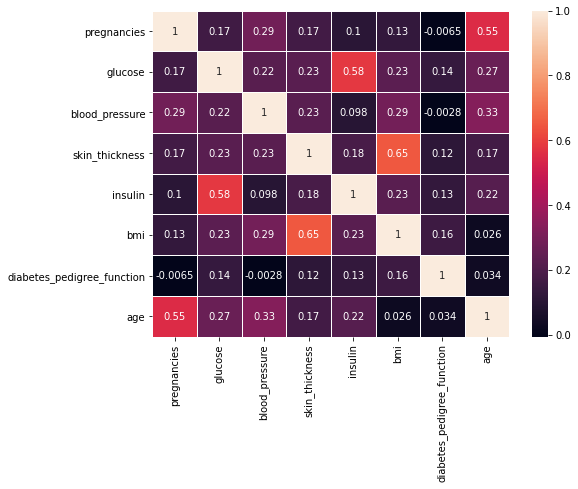

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(no_zeros.corr(), annot=True, linewidths=.5);

Viendo nuestra matriz, vemos que hay 3 relaciones que parecen ser más o menos relevantes:

1. 'insulin' vs 'glucose'
2. 'skin_thickness' vs 'bmi'
3. 'age' vs 'pregnancies'

---

Confirmemos estos hallazgos usando un pairplot:

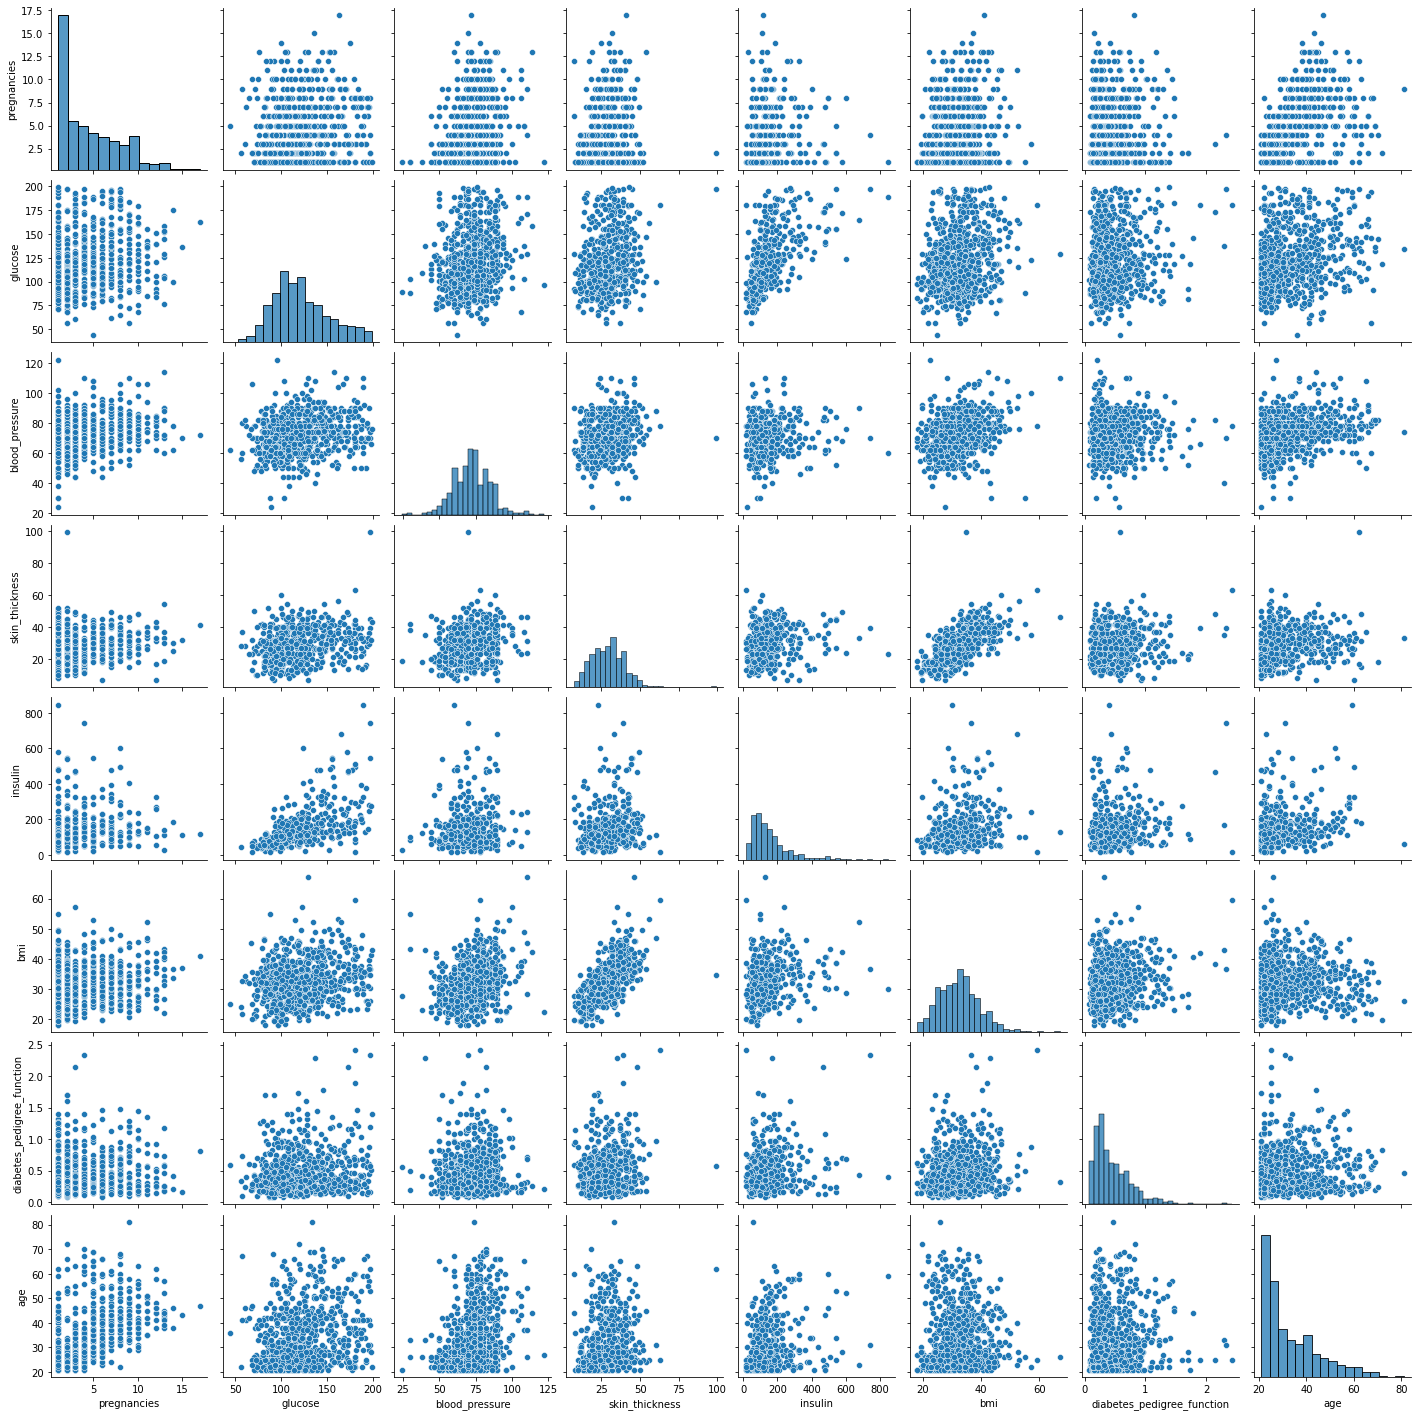

In [7]:
sns.pairplot(no_zeros);

Viendo estas gráficas podemos confirmar que los pares 'skin_thickness-bmi' y 'glucose-insulin' parecen estar suficientemente relacionados. 'pregnancies-age' no es tan clara en la visualización.

También podemos ver que en algunas de nuestras variables tenemos valores atípicos un poco extremos. Por ejemplo, en 'skin_thickness'. De hecho casi todas tienen algún valor que sobresale mucho.

Para volver a confirmar que dos variables están relacionadas o no habría que proceder de la siguiente manera:

1. Preguntarnos si estos valores atípicos son relevantes o podemos considerarlos anomalías (obviamente sólo un médico podría hacer esto efectivamente).
2. Si los consideramos anomalías entonces habría que removerlos de nuestro dataset.
3. Volver a cuantificar los coeficientes de correlación y las gráficas de pares para ver si algo cambio.

Sinceramente, no parece ser que los valores atípicos estén distorsionando demasiado nuestros cálculos, pero de todas maneras sería una buena práctica proceder de esta manera para confirmar nuestras hipótesis.

Por ejemplo, si elimino el valor atípico extremo de 'skin_thickness' realmente no cambian tanto nuestros coeficientes:

In [8]:
no_zeros = no_zeros[no_zeros['skin_thickness'] < 80]

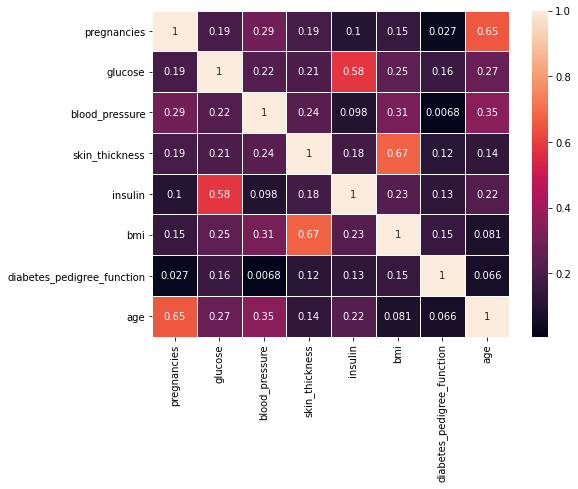

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(no_zeros.corr(), annot=True, linewidths=.5);

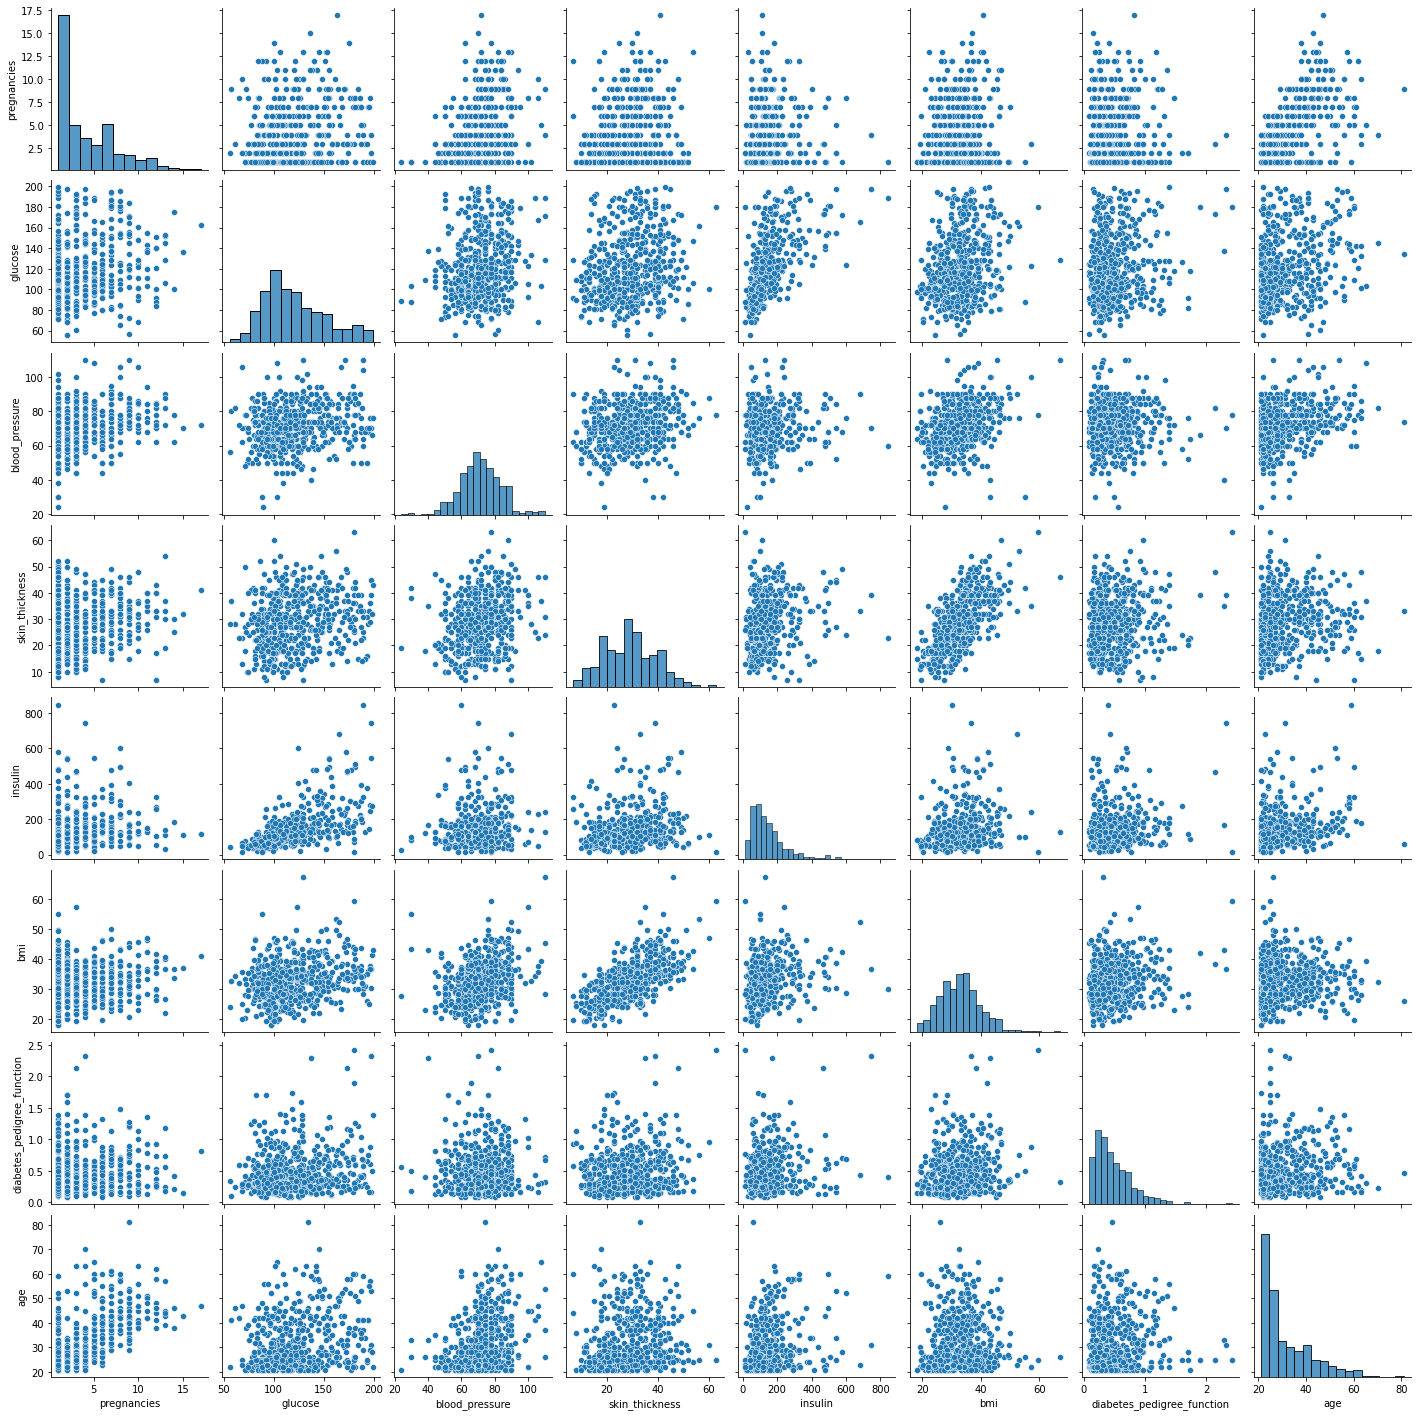

In [10]:
sns.pairplot(no_zeros)

También es muy importante siempre estar considerando el tamaño de tu dataset. Hay veces que removemos tantos valores que podemos quedarnos prácticamente sin dataset, lo cual indicaría, claro está, que nuestro dataset no es bueno.